# Import libraries and classes

In [66]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dython.nominal import associations
from pandas.api.types import is_string_dtype   
from scipy import stats
from sklearn.pipeline import make_pipeline  # Creating ML pipelines
from sklearn.preprocessing import StandardScaler  # Standardizing features
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble classifiers
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.preprocessing import LabelEncoder
pd.pandas.set_option('display.max_columns',None)
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report  # ML metrics

import joblib  # Saving and loading ML models
import warnings  # Controlling warning behavior

warnings.filterwarnings('ignore')  # Ignoring warnings


# Load dataset

In [3]:
dataset = pd.read_csv('kidney_disease.csv')


In [4]:
print(dataset.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba   
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  \
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe   
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no  \
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no  

# EDA

In [5]:
dataset.shape

(400, 26)

In [6]:
# dropping the id
# didnt contribute to the prediction
dataset.drop(['id'], axis=1,inplace = True)

In [7]:

# rename column names to make it more user-friendly
dataset.columns = ['age',
                'blood_pressure',
                'specific_gravity',
                'albumin',
                'sugar',
                'red_blood_cells',
                'pus_cell',
                'pus_cell_clumps',
                'bacteria',
                'blood_glucose_random',
                'blood_urea',
                'serum_creatinine',
                'sodium',
                'potassium',
                'haemoglobin',
                'packed_cell_volume',
                'white_blood_cell_count',
                'red_blood_cell_count',
                'hypertension',
                'diabetes_mellitus',
                'coronary_artery_disease',
                'appetite',
                'peda_edema',
                'aanemia',
                'class'
               ]

In [8]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# converting necessary columns to numerical type
dataset['packed_cell_volume']     = pd.to_numeric(dataset['packed_cell_volume']    , errors='coerce')
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'], errors='coerce')
dataset['red_blood_cell_count']   = pd.to_numeric(dataset['red_blood_cell_count']  , errors='coerce')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
# Extracting categorical and numerical columns
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [14]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [15]:
# replace incorrect values
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataset['coronary_artery_disease'].replace(to_replace ={'\tno':'no'},inplace=True)
dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'},inplace=True)

In [16]:
dataset['class'] = dataset['class'].map({'ckd': 0, 'not ckd': 1})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')

In [17]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



C:\Users\User\AppData\Local\Temp\ipykernel_3284\854706561.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])
C:\Users\User\AppData\Local\Temp\ipykernel_3284\854706561.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])
C:\Users\User\AppData\Local\Temp\ipykernel

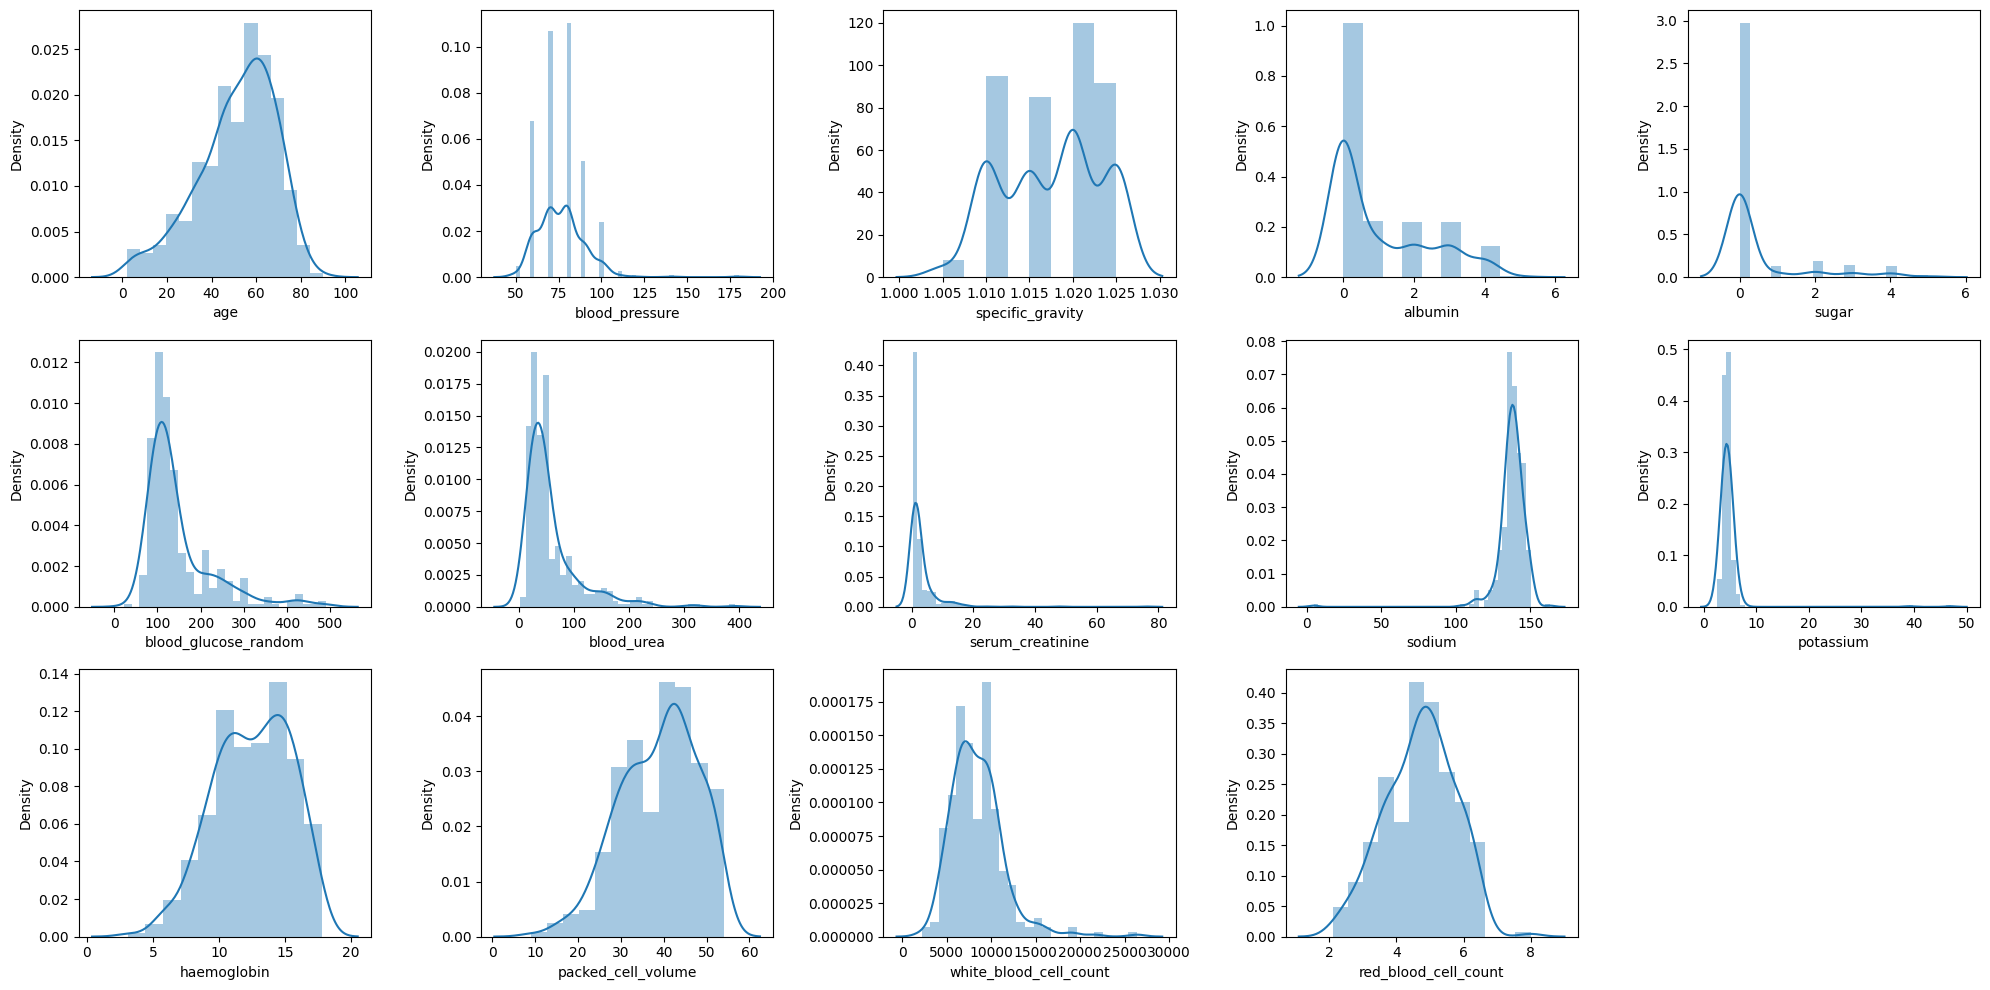

In [18]:
# checking numerical features distribution

plt.figure(figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.distplot(dataset[column])
        plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

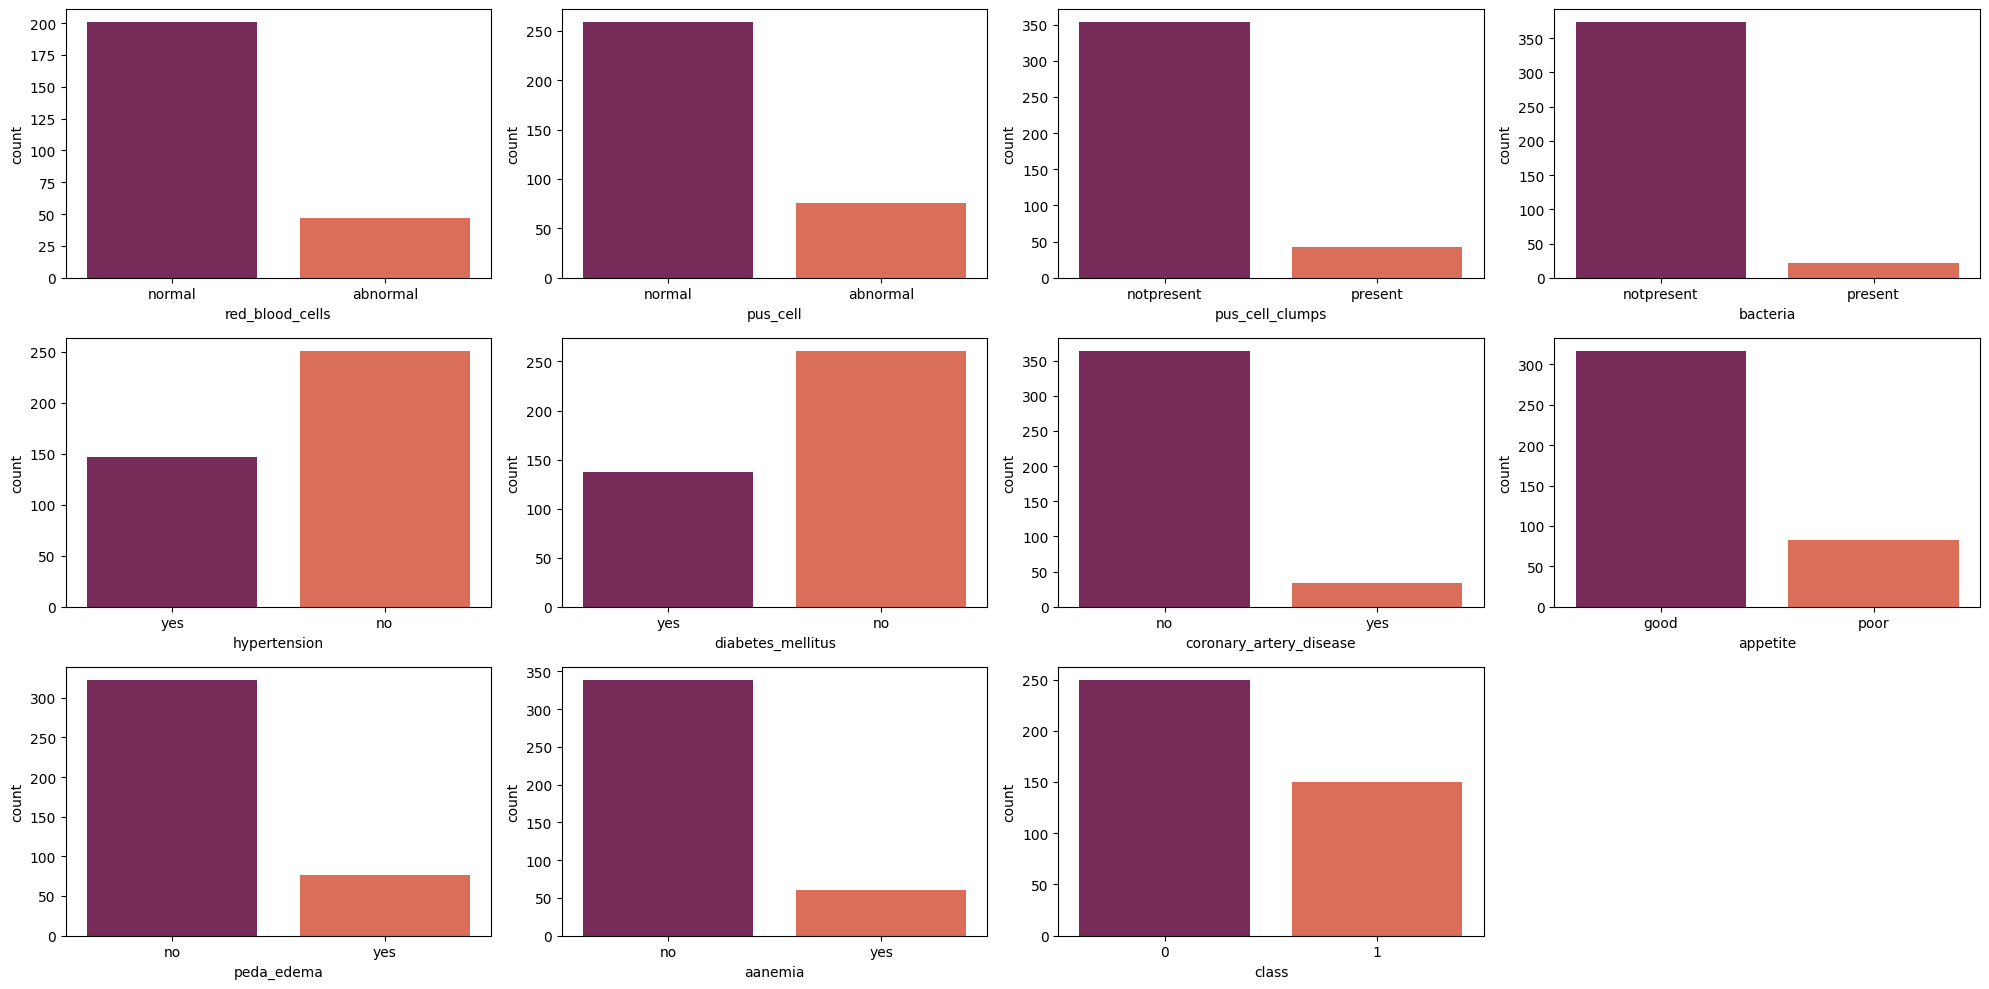

In [19]:
# looking at categorical columns

plt.figure(figsize=(20, 10))
plot_number = 1

for column in cat_cols:
    if plot_number <= 12:
        ax = plt.subplot(3, 4, plot_number)
        sns.countplot(data=dataset, x=column, palette='rocket')
        plt.xlabel(column)
    plot_number += 1

plt.tight_layout()
plt.show()

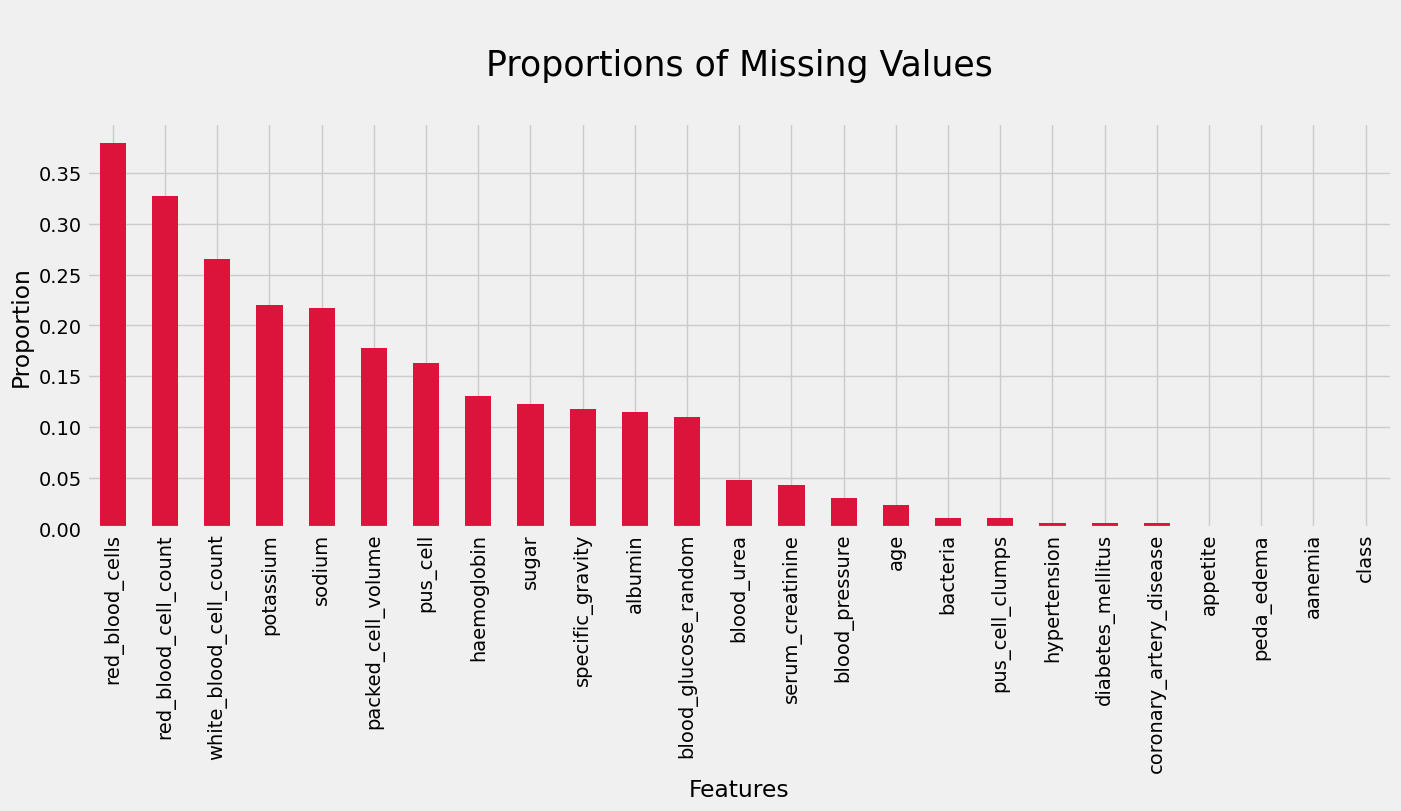

In [20]:
from matplotlib import style
style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})
missing=dataset.isna().sum().sort_values(ascending=False)
(missing/400).plot(kind="bar", color="crimson")
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

# generating heatmap using dython

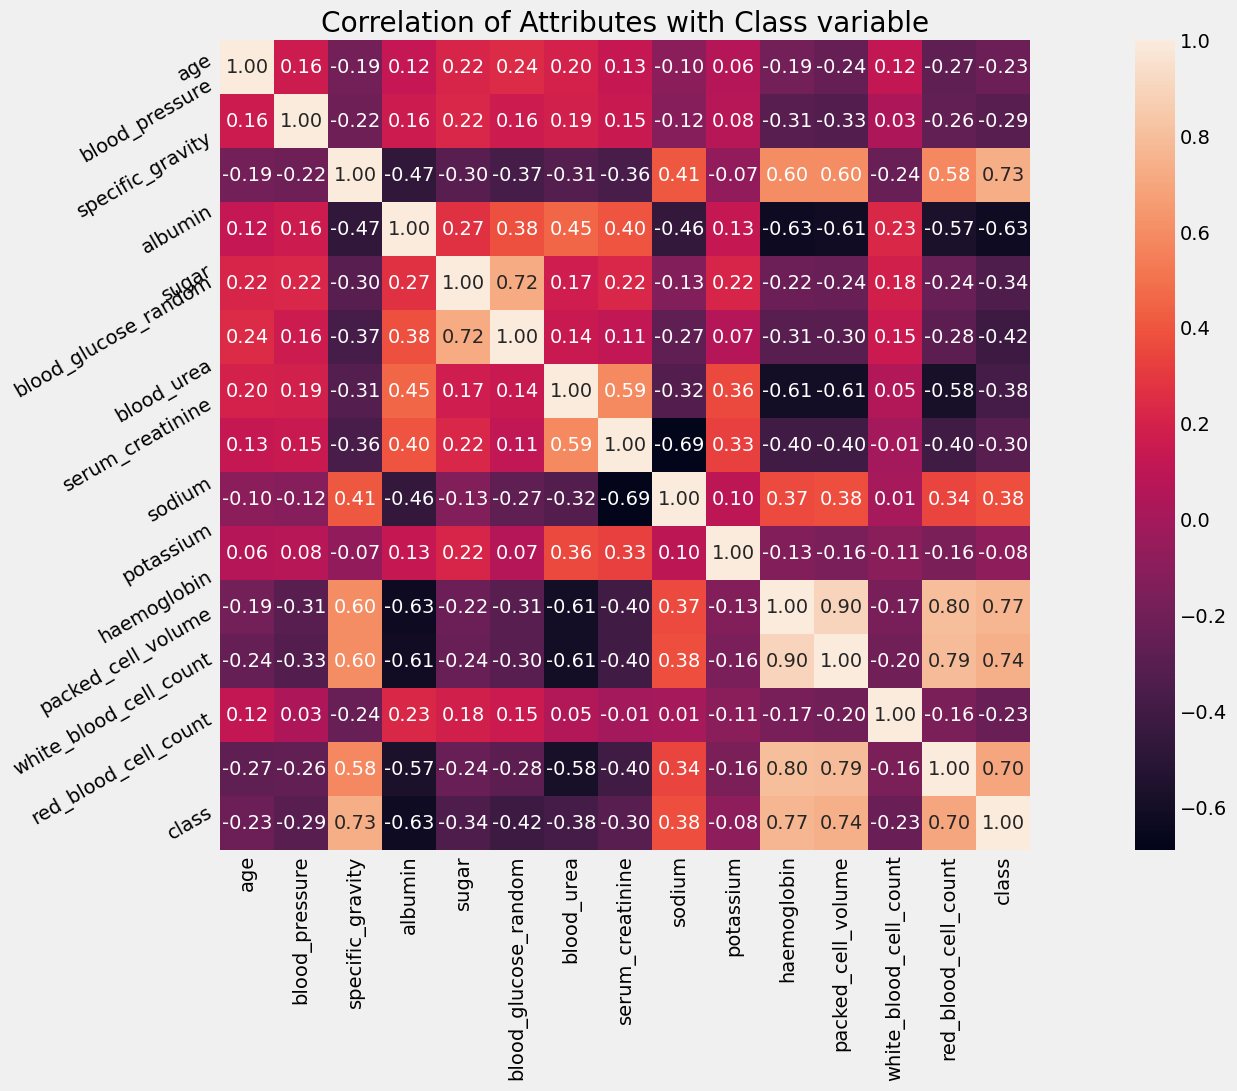

In [21]:
numeric_df = dataset.select_dtypes(include='number')  # Select only numeric columns
plt.figure(figsize=(24, 10))
plt.title('Correlation of Attributes with Class variable')
correlation = numeric_df.corr()
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [22]:
dataset.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [23]:
# defining functions to create plot

def violin(col):
    fig = px.violin(dataset, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(dataset, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(dataset, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [24]:
import plotly.express as px

def violin(col):
    fig = px.violin(dataset, y=col, x="class", color="class", box=True, template='plotly_dark')
    return fig.show()

violin('red_blood_cell_count')


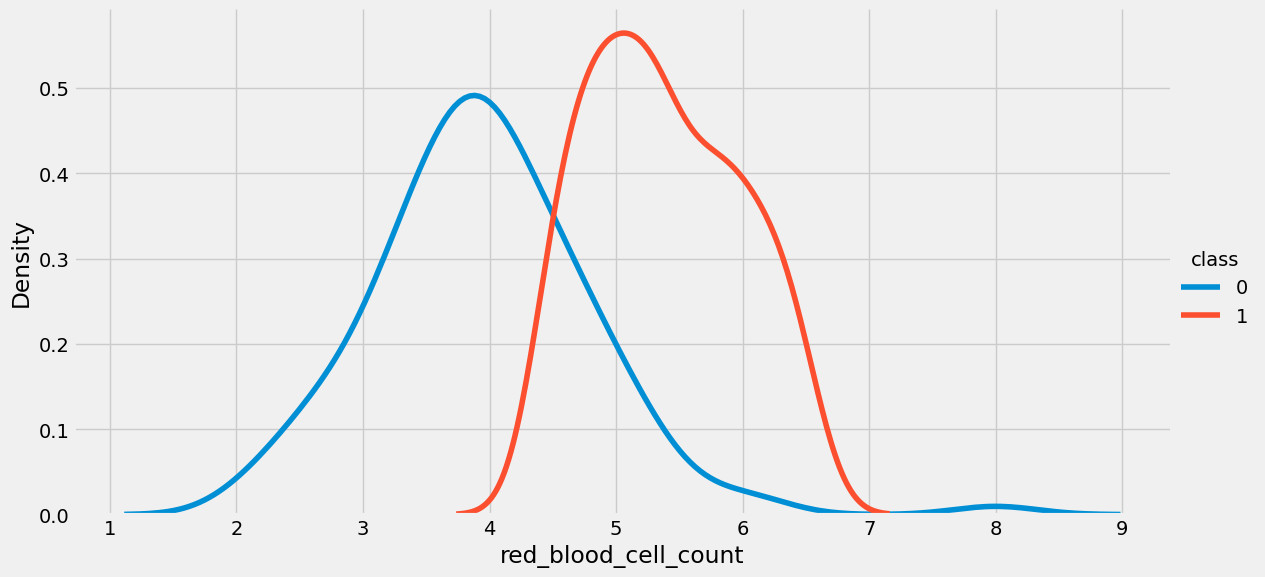

In [25]:
kde('red_blood_cell_count')

In [26]:
violin('white_blood_cell_count')

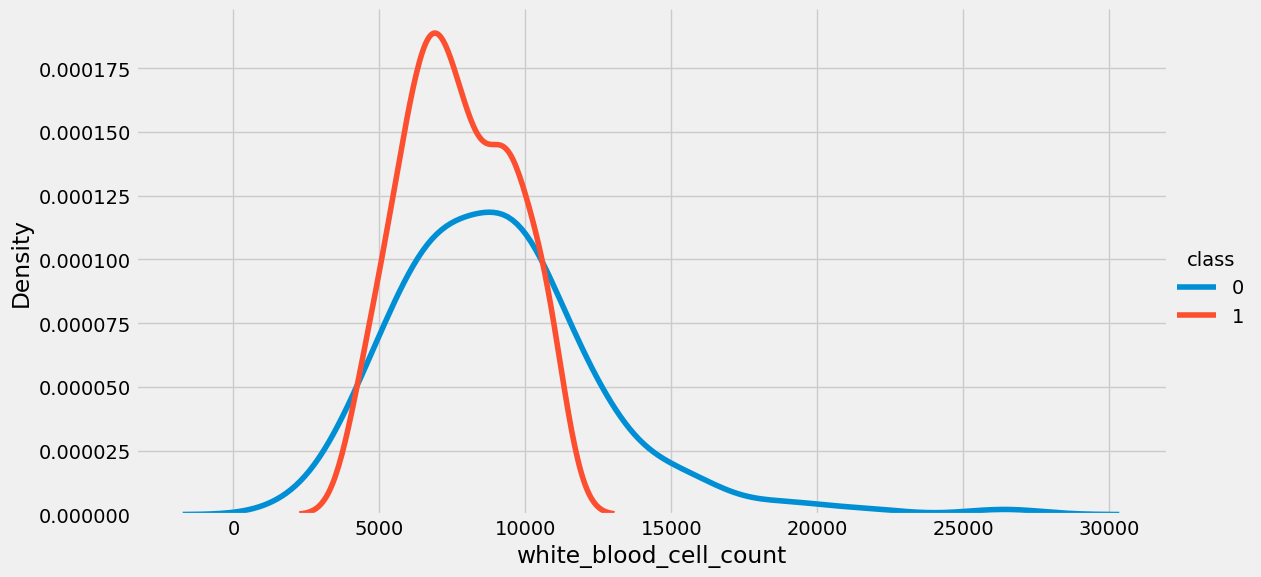

In [27]:
kde('white_blood_cell_count')

In [28]:
violin('packed_cell_volume')

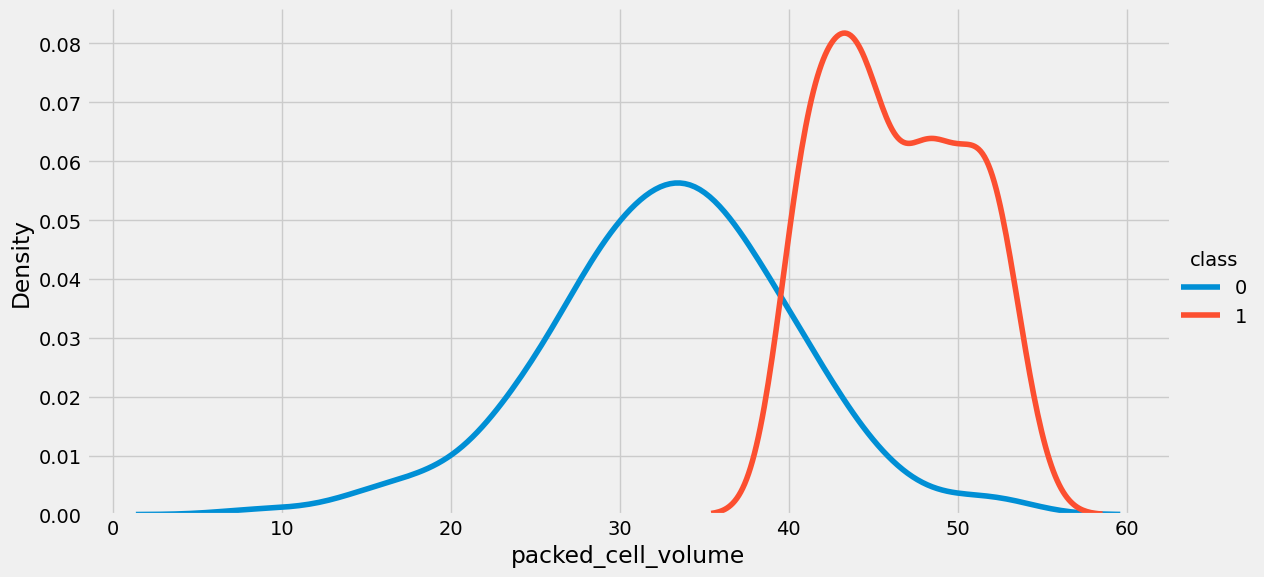

In [29]:
kde('packed_cell_volume')

In [30]:
violin('haemoglobin')

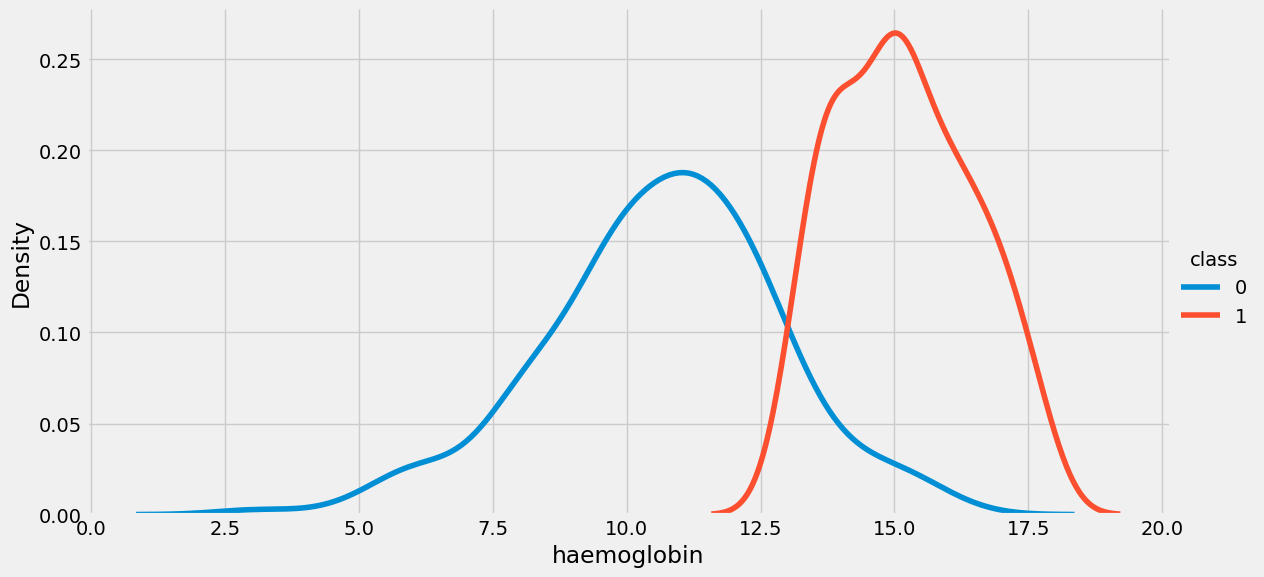

In [31]:
kde('haemoglobin')

In [32]:
violin('albumin')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



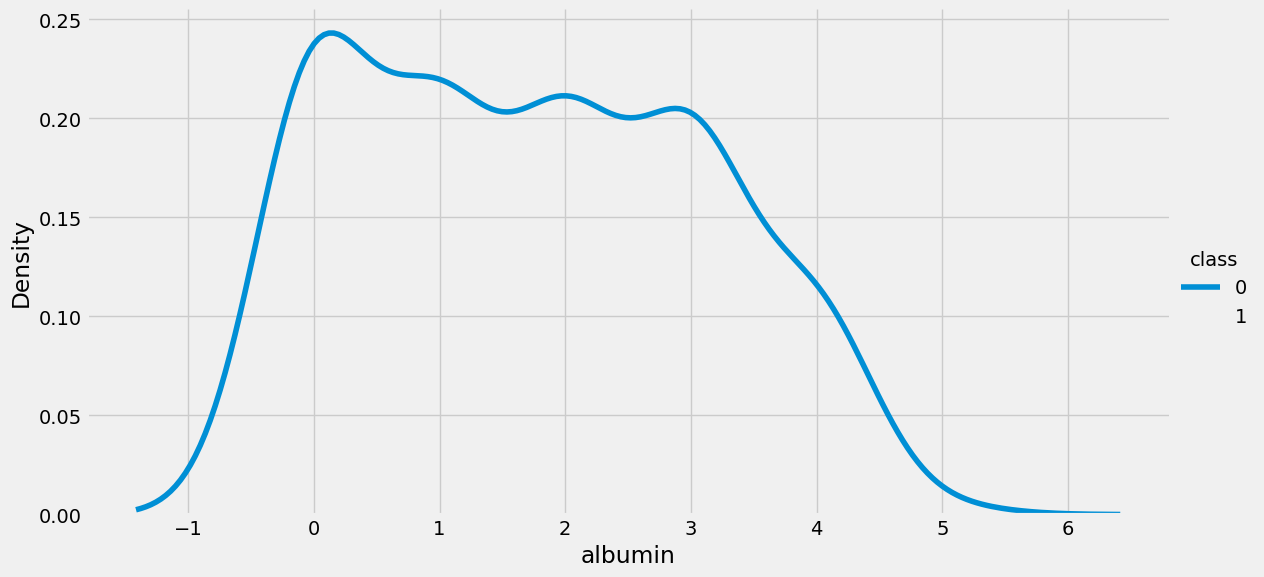

In [33]:
kde('albumin')

In [34]:
violin('blood_glucose_random')

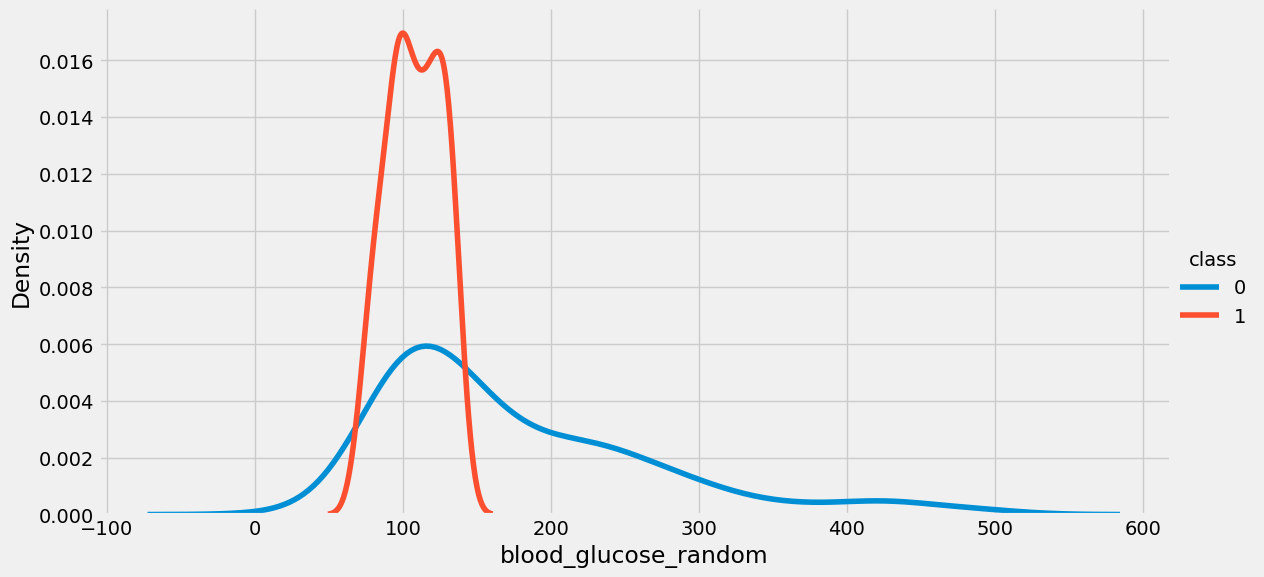

In [35]:
kde('blood_glucose_random')

In [36]:
violin('sodium')

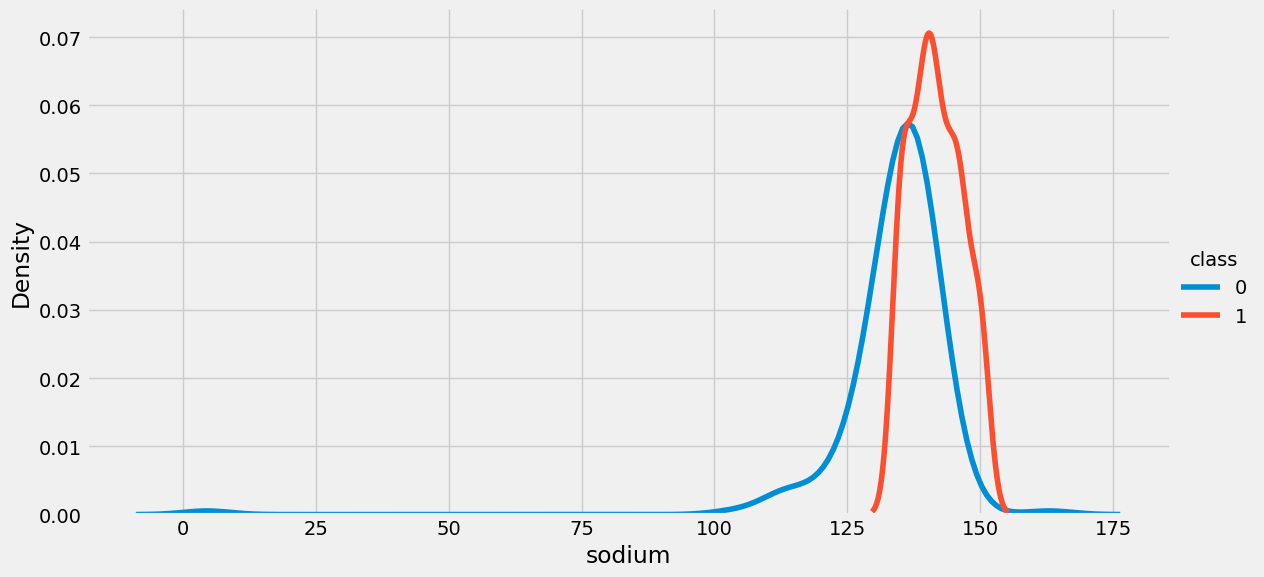

In [37]:
kde('sodium')


In [38]:
violin('blood_urea')

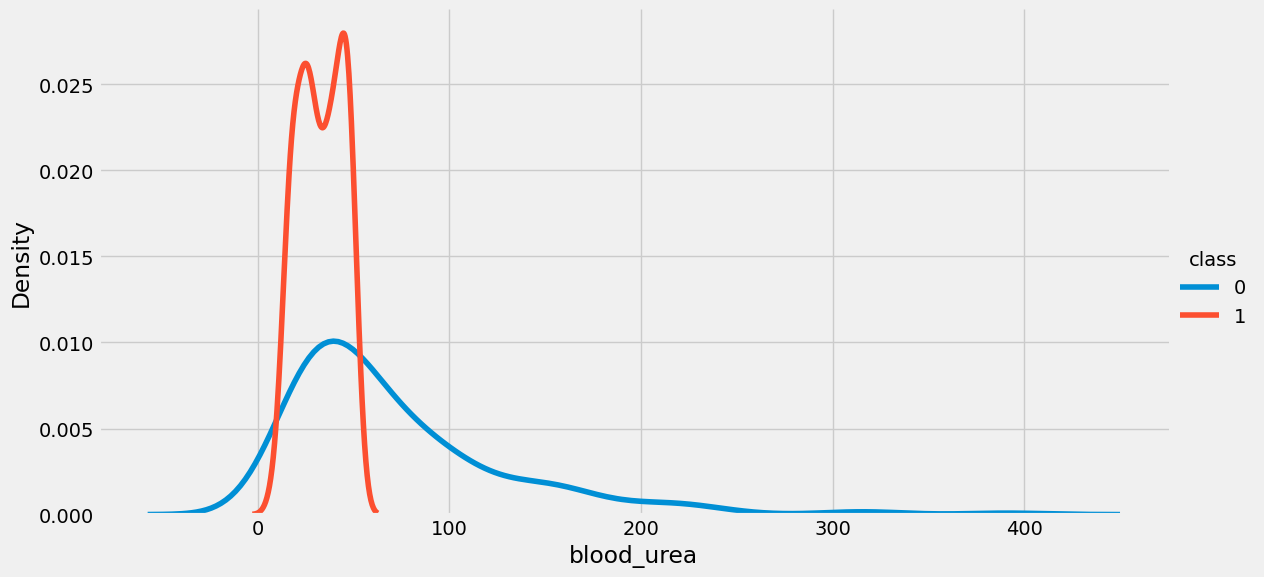

In [39]:
kde('blood_urea')

In [40]:
violin('specific_gravity')

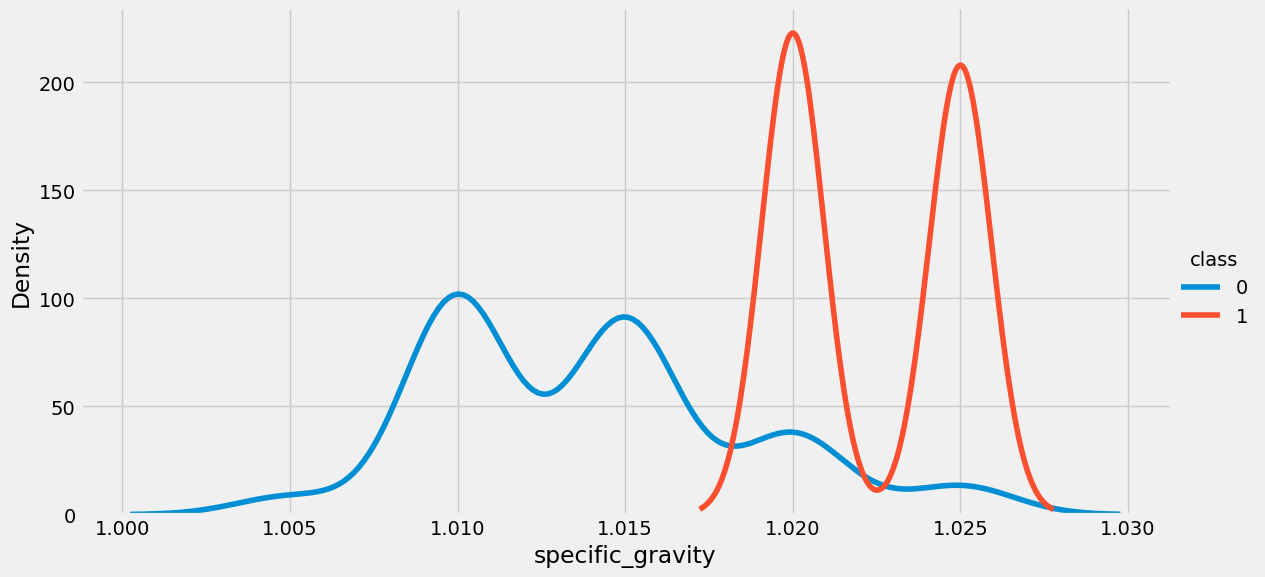

In [41]:
kde('specific_gravity')

In [42]:
scatter('haemoglobin', 'packed_cell_volume')

In [43]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [44]:
scatter('red_blood_cell_count', 'albumin')

In [45]:
scatter('sugar', 'blood_glucose_random')

In [46]:
scatter('packed_cell_volume','blood_urea')

In [47]:
px.bar(dataset, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [48]:
px.bar(dataset, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [49]:
px.bar(dataset, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [50]:
px.bar(dataset, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

# Data preprocessing

In [51]:
# checking for null values
dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [52]:
dataset[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [53]:
dataset[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [54]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample       = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [55]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [56]:
dataset[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [57]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [58]:
dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [59]:
for col in cat_cols:
    print(f"{col} has {dataset[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [61]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,135.0,47.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,294.0,18.0,0.8,139.0,4.7,11.3,38.0,6000.0,6.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,146.0,5.0,9.6,31.0,7500.0,3.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,147.0,5.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [62]:
dataset.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetes_mellitus            int32
coronary_artery_disease      int32
appetite                     int32
peda_edema                   int32
aanemia                      int32
class                        int64
dtype: object

# ML model training & EVALUATION

In [63]:
ind_col = [col for col in dataset.columns if col != 'class']
dep_col = 'class'
print(ind_col)
print(len(ind_col))
X = dataset[ind_col]
Y = dataset[dep_col]

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
24


In [64]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 0)

In [67]:
# Create a pipeline for each algorithm with StandardScaler
pipelines = [
    make_pipeline(StandardScaler(), LogisticRegression()),
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    make_pipeline(StandardScaler(), SVC()),
    make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    make_pipeline(StandardScaler(), RandomForestClassifier()),
    make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    make_pipeline(StandardScaler(), AdaBoostClassifier()),
    make_pipeline(StandardScaler(), GaussianNB())
   
]

# Fit each pipeline on the training data
for pipeline in pipelines:
    pipeline.fit(x_train, y_train)

In [68]:
# Create a list of algorithm names
algorithm_names = [pipeline.steps[-1][1].__class__.__name__ for pipeline in pipelines]
# Create a list to store the classification reports
reports = []

# Evaluate each pipeline on the test data and generate classification report
for algorithm, pipeline in zip(algorithm_names, pipelines):
    y_pred = pipeline.predict(x_test)
    report = classification_report(y_test, y_pred)
    reports.append((algorithm, report))

# Print the classification reports
for algorithm, report in reports:
    print(f"{algorithm} Classification Report:")
    print(report)
    print('-' * 50)

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

--------------------------------------------------
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       0.92      1.00      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

--------------------------------------------------
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.9

In [69]:
# Create empty lists to store the accuracy scores and model names
accuracy_scores = []
model_names = []

# Iterate over the pipelines
for pipeline in pipelines:
    # Get the accuracy score using the pipeline's score method
    accuracy = pipeline.score(x_test, y_test)
    accuracy_scores.append(accuracy)
    
    # Get the model name using the last step of the pipeline
    model_name = pipeline.steps[-1][1].__class__.__name__
    model_names.append(model_name)

# Create a dataframe with the accuracy scores and algorithm names
models_df = pd.DataFrame({'Model': model_names, 'Score': accuracy_scores})

# Sort the dataframe by the accuracy scores in descending order
models_df = models_df.sort_values('Score', ascending=False)

# Create the bar plot using Plotly Express
fig = px.bar(data_frame=models_df, x='Score', y='Model', color='Score',
             template='plotly_dark', title='Models Comparison')

# Show the plot
fig.show()